In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv

--2024-02-05 17:34:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24916 (24K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  24.33K  --.-KB/s    in 0.01s   

2024-02-05 17:34:52 (1.94 MB/s) - ‘teleCust1000t.csv’ saved [24916/24916]



In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

mydata = pd .read_csv('teleCust1000t.csv')

mydata.head()


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
name_col = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

mydata.columns = name_col

mydata.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
#Reading all the features

pd.set_option('display.max_columns', None)

mydata.head

<bound method NDFrame.head of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            1                 ?  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2                 ?         audi       gas        std   
..         ...               ...          ...       ...        ...   
199         -1                95        volvo       gas        std   
200         -1                95        volvo       gas      turbo   
201         -1                95        volvo       gas        std   
202         -1                95        volvo    diesel      turbo   
203         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           fr

In [ ]:
mydata.shape

(204, 26)

In [1]:
mydata.info()

NameError: name 'mydata' is not defined

In [9]:
mydata.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
mydata.replace('?', np.nan, inplace=True)

mydata.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [11]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [12]:
mydata.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Columns with missing values

<ol>
    <li>"normalized-losses": 40 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

In [13]:
mydata.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [14]:
mean_normal = mydata['normalized-losses'].astype('float').mean()
mean_bore = mydata['bore'].astype('float').mean()
mean_stroke = mydata['stroke'].astype('float').mean()
mean_horse = mydata['horsepower'].astype('float').mean()
mean_peak = mydata['peak-rpm'].astype('float').mean()

mydata['normalized-losses'].replace(np.nan, mean_normal, inplace = True)
mydata['bore'].replace(np.nan, mean_bore, inplace = True)
mydata['stroke'].replace(np.nan, mean_stroke, inplace = True)
mydata['horsepower'].replace(np.nan, mean_horse, inplace = True)
mydata['peak-rpm'].replace(np.nan, mean_peak, inplace = True)

mydata.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [15]:
mydata.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.0,204,204,204,202,204,204,204,204.000000,204.000000,204.000000,204.000000,204.000000,204,204,204.000000,204,204,204,204.000000,204,204,204.000000,204.000000,200
unique,NaN,52.0,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,185
top,NaN,122.0,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,16500
freq,NaN,40.0,32,184,167,114,96,120,201,NaN,NaN,NaN,NaN,NaN,148,158,NaN,93,23,20,NaN,19,37,NaN,NaN,2
mean,0.823529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.806373,174.075000,65.916667,53.749020,2555.602941,NaN,NaN,126.892157,NaN,NaN,NaN,10.148137,NaN,NaN,25.240196,30.769608,NaN
std,1.239035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.994144,12.362123,2.146716,2.424901,521.960820,NaN,NaN,41.744569,NaN,NaN,NaN,3.981000,NaN,NaN,6.551513,6.898337,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.075000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.575000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,119.500000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.200000,66.900000,55.500000,2939.250000,NaN,NaN,142.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.500000,NaN


In [16]:
mydata['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

In [17]:
mydata['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [18]:
mydata.dropna(subset=['price'], axis=0 , inplace=True)

In [19]:
mydata.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [20]:
mydata.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [21]:
mydata['normalized-losses'] = mydata['normalized-losses'].astype('float')
mydata['bore'] = mydata['bore'].astype('float')
mydata['stroke'] = mydata['stroke'].astype('float')
mydata['horsepower'] = mydata['horsepower'].astype('float')
mydata['peak-rpm'] = mydata['peak-rpm'].astype('float')
mydata['price'] = mydata['price'].astype('float')

In [22]:
mydata.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [23]:
mydata.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,200.000000,200.000000,200,200,200,200,200,200,200,200.000000,200.000000,200.000000,200.000000,200.000000,200,200,200.000000,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,180,164,115,94,118,197,NaN,NaN,NaN,NaN,NaN,145,156,NaN,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.830000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.848000,174.228000,65.898000,53.791500,2555.705000,NaN,NaN,126.860000,NaN,3.329981,3.259816,10.170100,103.367228,5118.259901,25.200000,30.705000,13205.690000
std,1.248557,32.076542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038261,12.347132,2.102904,2.428449,518.594552,NaN,NaN,41.650501,NaN,0.268562,0.314177,4.014163,37.455570,479.240743,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.675000,64.175000,52.000000,2163.000000,NaN,NaN,97.750000,NaN,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,119.500000,NaN,3.310000,3.290000,9.000000,95.000000,5162.995050,24.000000,30.000000,10270.000000
75%,2.000000,138.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.500000,66.675000,55.525000,2928.250000,NaN,NaN,142.000000,NaN,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000


In [24]:
mydata.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [25]:
mydata['city-L/100km'] = 235/mydata['city-mpg']
mydata['highway-L/100km'] = 235/mydata['highway-mpg']

mydata.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,9.400000


**Data Normalization**

In [26]:
data = mydata[['width', 'length', 'height']]
data.head(15)

,width,length,height
0,64.1,168.8,48.8
1,65.5,171.2,52.4
2,66.2,176.6,54.3
3,66.4,176.6,54.3
4,66.3,177.3,53.1
5,71.4,192.7,55.7
6,71.4,192.7,55.7
7,71.4,192.7,55.9
9,64.8,176.8,54.3
10,64.8,176.8,54.3


In [27]:
#simnple feature scalling

data['width'] = data['width']/data['width'].max()

data.head(15)

<ipython-input-27-23d97a98afbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['width'] = data['width']/data['width'].max()


,width,length,height
0,0.890278,168.8,48.8
1,0.909722,171.2,52.4
2,0.919444,176.6,54.3
3,0.922222,176.6,54.3
4,0.920833,177.3,53.1
5,0.991667,192.7,55.7
6,0.991667,192.7,55.7
7,0.991667,192.7,55.9
9,0.900000,176.8,54.3
10,0.900000,176.8,54.3


In [28]:
#min-max

mydata['length'] = (mydata['length']-mydata['length'].min())/(mydata['length'].max()-mydata['length'].min())

mydata['length'].head(15)

0     0.413433
1     0.449254
2     0.529851
3     0.529851
4     0.540299
5     0.770149
6     0.770149
7     0.770149
9     0.532836
10    0.532836
11    0.532836
12    0.532836
13    0.714925
14    0.714925
15    0.786567
Name: length, dtype: float64

In [29]:
# z score

mydata['height'] = (mydata['height'] - mydata['height'].mean())/mydata['height'].std()

mydata['height'].head(15)

0    -2.055427
1    -0.572999
2     0.209393
3     0.209393
4    -0.284750
5     0.785893
6     0.785893
7     0.868250
9     0.209393
10    0.209393
11    0.209393
12    0.209393
13    0.785893
14    0.785893
15   -0.037678
Name: height, dtype: float64

**Converting categorical to numeric**

In [30]:
mydata.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
dtype: object

In [31]:
mydata.describe(include='all')


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,200.000000,200.000000,200,200,200,200,200,200,200,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200,200,200.000000,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,180,164,115,94,118,197,NaN,NaN,NaN,NaN,NaN,145,156,NaN,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.830000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.848000,0.494448,65.898000,-2.451372e-15,2555.705000,NaN,NaN,126.860000,NaN,3.329981,3.259816,10.170100,103.367228,5118.259901,25.200000,30.705000,13205.690000,9.937914,8.041663
std,1.248557,32.076542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038261,0.184286,2.102904,1.000000e+00,518.594552,NaN,NaN,41.650501,NaN,0.268562,0.314177,4.014163,37.455570,479.240743,6.432487,6.827227,7966.982558,2.539415,1.844764
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.000000,60.300000,-2.467213e+00,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,100.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.381716,64.175000,-7.377137e-01,2163.000000,NaN,NaN,97.750000,NaN,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.479104,65.500000,1.270358e-01,2414.000000,NaN,NaN,119.500000,NaN,3.310000,3.290000,9.000000,95.000000,5162.995050,24.000000,30.000000,10270.000000,9.791667,7.833333
75%,2.000000,138.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.632836,66.675000,7.138301e-01,2928.250000,NaN,NaN,142.000000,NaN,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000,12.368421,9.400000


In [32]:
convert_fuel = pd.get_dummies(mydata['fuel-type'])

convert_fuel.head(20)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
9,0,1
10,0,1


In [33]:
mydata1 = pd.concat([mydata, convert_fuel], axis=1)

mydata1.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,64.1,-2.055427,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0,1
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.449254,65.5,-0.572999,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0,1
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.529851,66.2,0.209393,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0,1
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.529851,66.4,0.209393,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0,1
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.540299,66.3,-0.284750,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0,12.368421,9.400000,0,1
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.770149,71.4,0.785893,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,12.368421,9.400000,0,1
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.770149,71.4,0.785893,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0,12.368421,9.400000,0,1
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.770149,71.4,0.868250,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,13.823529,11.750000,0,1
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.532836,64.8,0.209393,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,10.217391,8.103448,0,1
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.532836,64.8,0.209393,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16925.0,10.217391,8.103448,0,1


In [34]:
mydata1.rename(columns={'gas':'gas_fuel', 'diesel':'diesel_fuel'}, inplace=True)

mydata1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel_fuel,gas_fuel
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,64.1,-2.055427,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0,1
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.449254,65.5,-0.572999,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0,1
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.529851,66.2,0.209393,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0,1
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.529851,66.4,0.209393,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0,1
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.540299,66.3,-0.284750,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,9.400000,0,1


In [35]:
convert_asp = pd.get_dummies(mydata['aspiration'])

convert_asp.head(20)

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
9,1,0
10,1,0


In [36]:
mydata2 = pd.concat([mydata1, convert_asp], axis=1)

mydata2.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel_fuel,gas_fuel,std,turbo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,64.1,-2.055427,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.449254,65.5,-0.572999,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.529851,66.2,0.209393,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.529851,66.4,0.209393,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.540299,66.3,-0.284750,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0,12.368421,9.400000,0,1,1,0
5,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,0.770149,71.4,0.785893,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,12.368421,9.400000,0,1,1,0
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,0.770149,71.4,0.785893,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0,12.368421,9.400000,0,1,1,0
7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,0.770149,71.4,0.868250,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,13.823529,11.750000,0,1,0,1
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,0.532836,64.8,0.209393,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,10.217391,8.103448,0,1,1,0
10,0,192.0,bmw,gas,std,four,sedan,rwd,front,101.2,0.532836,64.8,0.209393,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16925.0,10.217391,8.103448,0,1,1,0


In [37]:
mydata2.rename(columns={'std':'std_aspiration', 'turbo':'turbo_aspiration'}, inplace=True)

mydata2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel_fuel,gas_fuel,std_aspiration,turbo_aspiration
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,64.1,-2.055427,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.449254,65.5,-0.572999,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.529851,66.2,0.209393,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.529851,66.4,0.209393,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.540299,66.3,-0.284750,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,9.400000,0,1,1,0


In [38]:
mydata2['num-of-doors'].head()

0     two
1     two
2    four
3    four
4     two
Name: num-of-doors, dtype: object

In [39]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['num-of-doors', 'body-style'])

mydata_encode = mydata[['num-of-doors', 'body-style']]
mydata_encode = encoder.fit_transform(mydata_encode)
mydata_encode

,num-of-doors,body-style
0,1,1
1,1,2
2,2,3
3,2,3
4,1,3
...,...,...
199,2,3
200,2,3
201,2,3
202,2,3


`**Data Binning**

In [40]:
mydata2['price'].head(30)

0     16500.0
1     16500.0
2     13950.0
3     17450.0
4     15250.0
5     17710.0
6     18920.0
7     23875.0
9     16430.0
10    16925.0
11    20970.0
12    21105.0
13    24565.0
14    30760.0
15    41315.0
16    36880.0
17     5151.0
18     6295.0
19     6575.0
20     5572.0
21     6377.0
22     7957.0
23     6229.0
24     6692.0
25     7609.0
26     8558.0
27     8921.0
28    12964.0
29     6479.0
30     6855.0
Name: price, dtype: float64

In [41]:
bins_price = np.linspace(min(mydata2['price']), max(mydata2['price']), 4)

bins_price

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [42]:
cat_price = ['Low', 'Medium', 'High']

mydata2['price_cat'] = pd.cut(mydata2['price'], bins_price, labels=cat_price)

mydata2.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel_fuel,gas_fuel,std_aspiration,turbo_aspiration,price_cat
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.413433,64.1,-2.055427,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0,Low
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.449254,65.5,-0.572999,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0,Low
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.529851,66.2,0.209393,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0,Low
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.529851,66.4,0.209393,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0,Low
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,0.540299,66.3,-0.284750,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,9.400000,0,1,1,0,Low


In [43]:
mydata2[['price', 'price_cat']].head(30)

,price,price_cat
0,16500.0,Low
1,16500.0,Low
2,13950.0,Low
3,17450.0,Low
4,15250.0,Low
5,17710.0,Low
6,18920.0,Medium
7,23875.0,Medium
9,16430.0,Low
10,16925.0,Low


In [44]:
mydata2['price_cat'].value_counts()

Low       169
Medium     18
High       12
Name: price_cat, dtype: int64

In [45]:
mydata2.to_csv('cleaned_data')

In [46]:
mydata2.corr()

<ipython-input-46-da57d007c6c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mydata2.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel_fuel,gas_fuel,std_aspiration,turbo_aspiration
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,-0.181073,0.074625,0.284033,-0.030158,0.041248,-0.083327,0.062423,-0.033159,-0.195381,0.195381,0.050995,-0.050995
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,-0.114738,0.217322,0.239580,-0.225255,-0.182011,0.133999,0.238712,0.181247,-0.101574,0.101574,0.006915,-0.006915
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,0.249689,0.375582,-0.365045,-0.480029,-0.552211,0.589147,0.484047,0.584953,0.306706,-0.306706,-0.254907,0.254907
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,0.159203,0.580606,-0.286688,-0.667658,-0.700186,0.691044,0.659174,0.708466,0.210616,-0.210616,-0.229294,0.229294
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,0.189008,0.617132,-0.247337,-0.638155,-0.684700,0.752795,0.677111,0.739845,0.243448,-0.243448,-0.304459,0.304459
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,0.259526,-0.085852,-0.315820,-0.057087,-0.111568,0.137284,0.008923,0.088903,0.281198,-0.281198,-0.086531,0.086531
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,0.156444,0.758071,-0.279422,-0.750390,-0.795515,0.834420,0.785868,0.837217,0.221082,-0.221082,-0.322097,0.322097
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,0.029005,0.822695,-0.256681,-0.651002,-0.679877,0.872337,0.745337,0.783593,0.070925,-0.070925,-0.110278,0.110278
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,0.002034,0.566835,-0.267061,-0.581272,-0.590672,0.543433,0.553954,0.558675,0.055395,-0.055395,-0.229338,0.229338
stroke,0.008072,0.055673,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,0.186780,0.101003,-0.066021,-0.040547,-0.040170,0.083298,0.041310,0.051032,0.240046,-0.240046,-0.215805,0.215805


In [47]:
mydata2[['price', 'engine-size', 'city-mpg', 'wheel-base', 'horsepower', 'stroke']].corr()

,price,engine-size,city-mpg,wheel-base,horsepower,stroke
price,1.000000,0.872337,-0.687186,0.589147,0.809629,0.083298
engine-size,0.872337,1.000000,-0.651002,0.576779,0.822695,0.208133
city-mpg,-0.687186,-0.651002,1.000000,-0.480029,-0.822507,-0.040547
wheel-base,0.589147,0.576779,-0.480029,1.000000,0.375582,0.144733
horsepower,0.809629,0.822695,-0.822507,0.375582,1.000000,0.101003
stroke,0.083298,0.208133,-0.040547,0.144733,0.101003,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

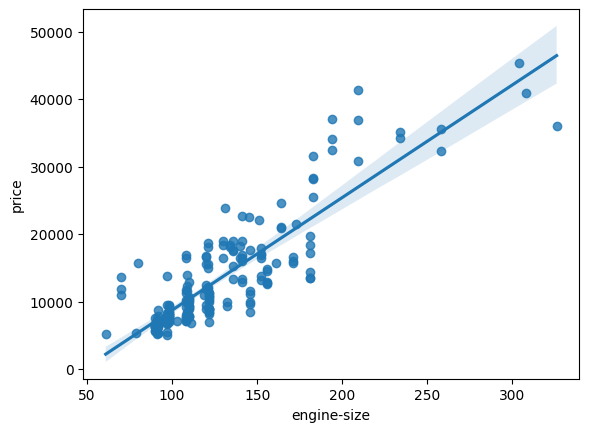

In [48]:
sns.regplot(x='engine-size', y='price', data=mydata2)

<Axes: xlabel='city-mpg', ylabel='price'>

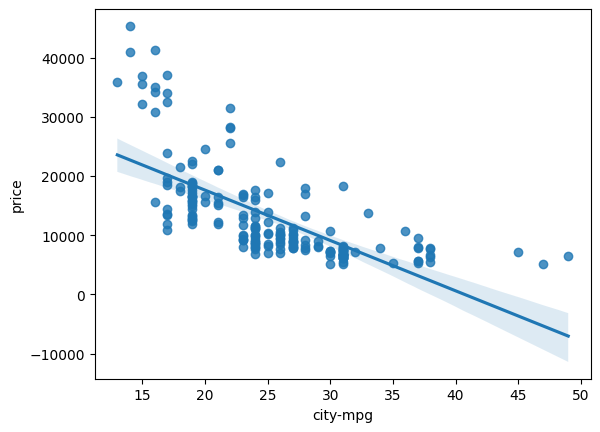

In [49]:
sns.regplot(x='city-mpg', y='price', data=mydata2)

<Axes: xlabel='stroke', ylabel='price'>

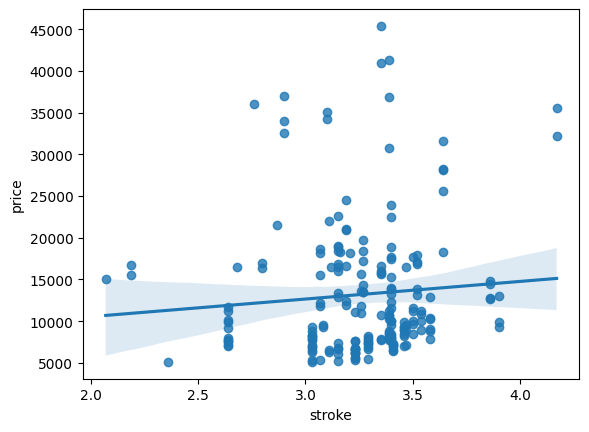

In [50]:
sns.regplot(x='stroke', y='price', data=mydata2)

In [53]:
#pearson methon

correlation, p_value = st.pearsonr(mydata2['price'], mydata2['engine-size'])

print ('pearson coef is: ', correlation, 'P_value is: ', p_value)

pearson coef is:  0.8723367498521142 P_value is:  1.8977171466561833e-63


In [55]:
correlation, p_value = st.pearsonr(mydata2['price'], mydata2['stroke'])

print ('pearson coef is: ', correlation, 'P_value is: ', p_value)

pearson coef is:  0.08329789750121726 P_value is:  0.24092998723899006


In [57]:
mydata2['stroke'].isnull().sum()

0

In [58]:
correlation, p_value = st.pearsonr(mydata2['price'], mydata2['symboling'])
print ('pearson coef is: ', correlation, 'P_value is: ', p_value)

pearson coef is:  -0.08332690970811948 P_value is:  0.240765602307741


In [60]:
mydata2.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
diesel_fuel             uint8
gas_fuel                uint8
std_aspiration          uint8
turbo_aspiration        uint8
price_cat            category
dtype: obj

<Axes: xlabel='make', ylabel='price'>

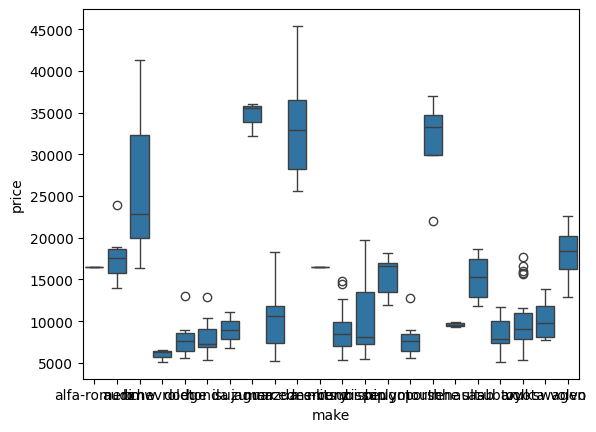

In [61]:
sns.boxplot(x='make', y='price', data=mydata2)

<Axes: xlabel='aspiration', ylabel='price'>

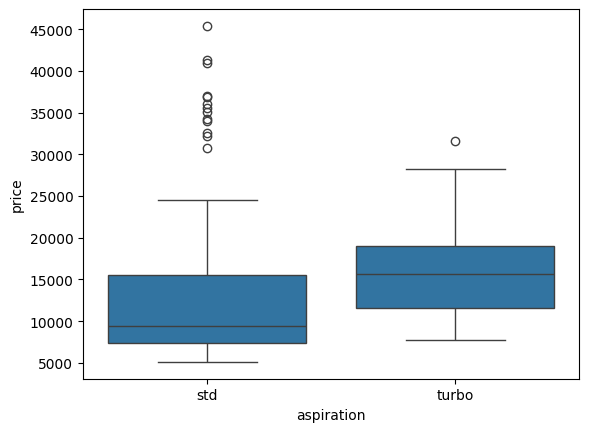

In [62]:
sns.boxplot(x='aspiration', y='price', data=mydata2)

<Axes: xlabel='num-of-doors', ylabel='price'>

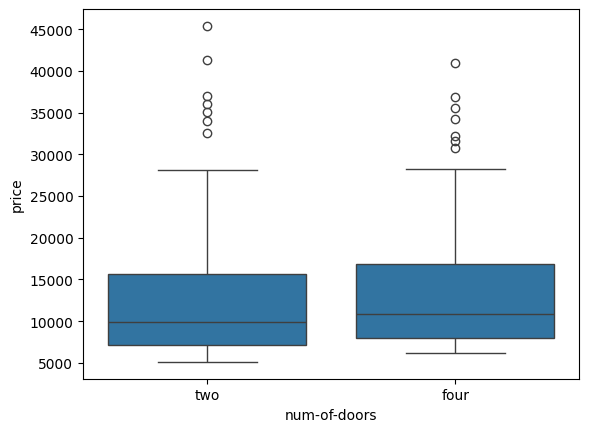

In [63]:
sns.boxplot(x='num-of-doors', y='price', data=mydata2)

<Axes: xlabel='drive-wheels', ylabel='price'>

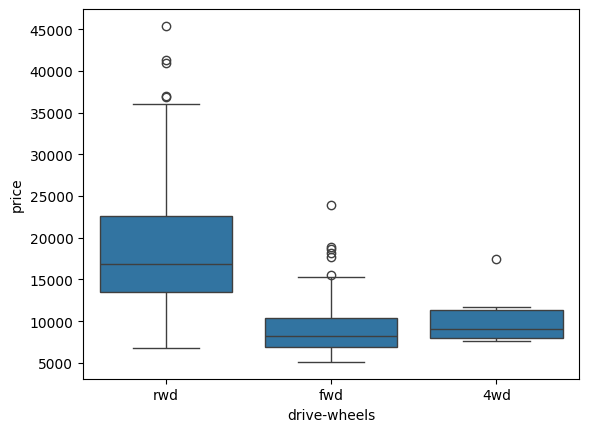

In [64]:
sns.boxplot(x='drive-wheels', y='price', data=mydata2)

<Axes: xlabel='body-style', ylabel='price'>

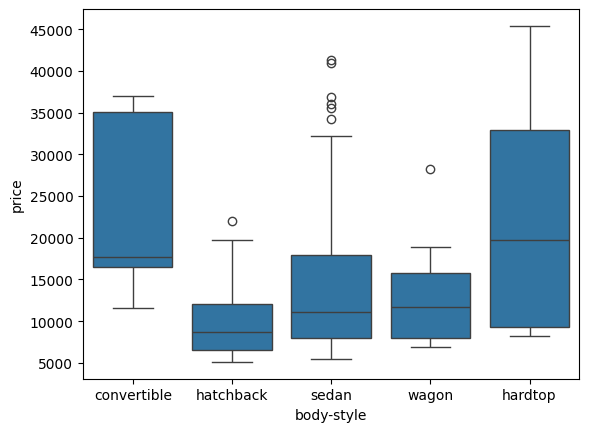

In [65]:
sns.boxplot(x='body-style', y='price', data=mydata2)

In [66]:
#groupby

mydata3 = mydata2[['body-style', 'drive-wheels', 'price']]

mydata3.head()

,body-style,drive-wheels,price
0,convertible,rwd,16500.0
1,hatchback,rwd,16500.0
2,sedan,fwd,13950.0
3,sedan,4wd,17450.0
4,sedan,fwd,15250.0


In [67]:
mydata3_group = mydata3.groupby(['body-style', 'drive-wheels'], as_index=False).mean()

mydata3_group

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,26563.250000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


In [68]:
mydata3_pivot =mydata3_group.pivot(index='drive-wheels', columns='body-style')

mydata3_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

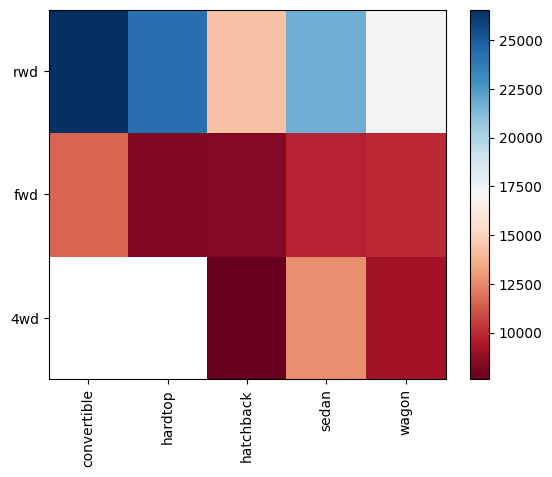

In [69]:
#heatmap

fig, ax = plt.subplots()
im = ax.pcolor(mydata3_pivot, cmap='RdBu')

#label names
row_labels = mydata3_pivot.columns.levels[1]
col_labels = mydata3_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(mydata3_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(mydata3_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [70]:
#groupby

mydata4 = mydata2[['aspiration', 'engine-location', 'price']]

mydata4.head()

,aspiration,engine-location,price
0,std,front,16500.0
1,std,front,16500.0
2,std,front,13950.0
3,std,front,17450.0
4,std,front,15250.0


In [71]:
mydata4_group = mydata4.groupby(['aspiration', 'engine-location'], as_index=False).mean()

mydata4_group

,aspiration,engine-location,price
0,std,front,12126.590062
1,std,rear,34528.000000
2,turbo,front,16254.805556


In [72]:
mydata4_pivot = mydata4_group.pivot(index='engine-location', columns='aspiration')

mydata4_pivot

price              
aspiration                std         turbo
engine-location                            
front            12126.590062  16254.805556
rear             34528.000000           NaN

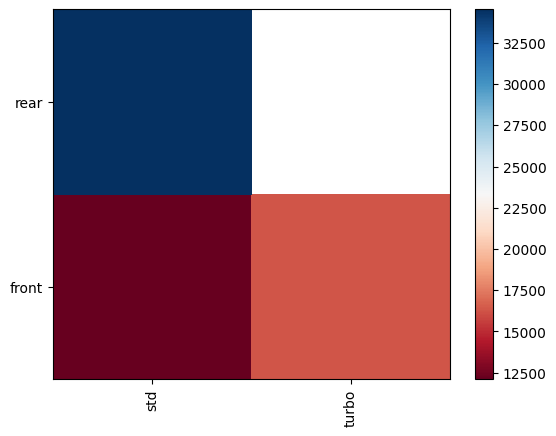

In [73]:
#heatmap



fig, ax = plt.subplots()
im = ax.pcolor(mydata4_pivot, cmap='RdBu')

#label names
row_labels = mydata4_pivot.columns.levels[1]
col_labels = mydata4_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(mydata4_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(mydata4_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()